# INF391 - Tarea 4
Se tienen dos conjuntos de 100 objetos cada uno, todos ubicados dentro de un cuadrado unitario en el eje cartesiano (2-d). El primer conjunto está distribuido de manera uniforme y el segundo fue generado aleatoriamente.


1. En términos de densidad, ¿qué diferencia existe entre los dos conjuntos?.
2. ¿Qué conjunto tiene menor SSE para $K=10$ clusters?.
3. Muestre y comente el comportamiento de DBSCAN en cada conjunto de datos.


In [47]:
from sklearn.cluster import DBSCAN
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
random = genfromtxt('random.csv', delimiter=',')
uniform = genfromtxt('uniform.csv', delimiter=',')


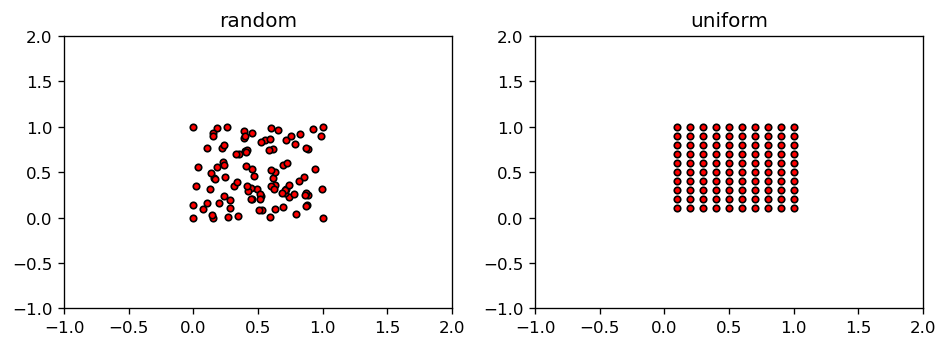

In [4]:
# Crear Figuras
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)

# Plot
ax1.scatter(random[:,0], random[:,1], s=15, facecolors = 'red', edgecolors = "black")  
ax2.scatter(uniform[:,0], uniform[:,1], s=15, facecolors = 'red', edgecolors = "black") 

ax1.set_title('random')
ax2.set_title('uniform')

ax1.set_xlim((-1,2))
ax1.set_ylim((-1,2))

ax2.set_xlim((-1,2))
ax2.set_ylim((-1,2))

plt.tight_layout()
plt.show()

1) En términos de densidad, la imagen con puntos aleatorios presenta densidades distintas en varias regiones, estos por el hecho de ser puntos aleatorios sin ningún orden en particular, mientras que la imagen con los puntos ordenados de manera uniforme presenta densidades iguales en varias regiones esto por la característica de están ordenados de manera uniforme.

SSE RANDOM:  1.5073600591893979
SSE UNIFORM:  1.6509999999999998


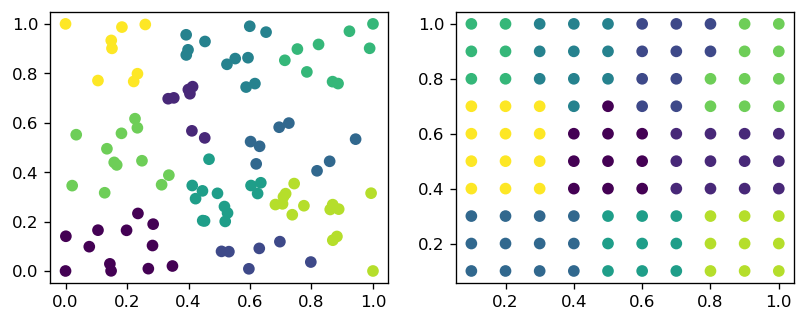

In [58]:
kmeans_1 = KMeans(n_clusters=10, random_state=0).fit(random)
centroids = kmeans_1.cluster_centers_
cluster = kmeans_1.predict(random)
sse1 = kmeans_1.inertia_

print("SSE RANDOM: ",sse1)

kmeans_2 = KMeans(n_clusters=10, random_state=0).fit(uniform)
centroids_2 = kmeans_2.cluster_centers_
cluster_2 = kmeans_2.predict(uniform)

sse2 = kmeans_2.inertia_
print("SSE UNIFORM: ",sse2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)

ax1.scatter(random[:, 0], random[:, 1], c=cluster)

ax2.scatter(uniform[:, 0], uniform[:, 1], c=cluster_2)

plt.show()

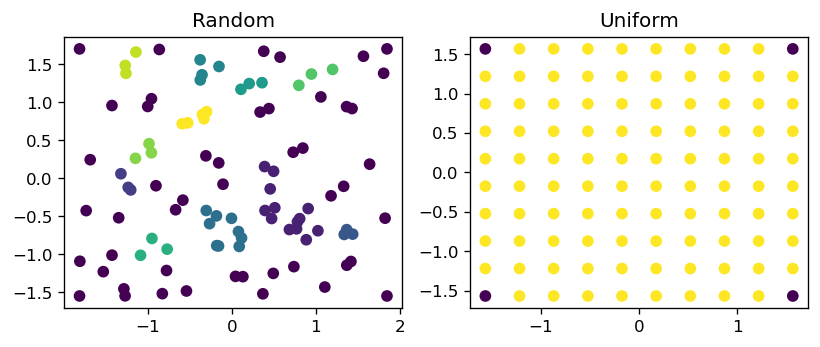

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)

scaler = StandardScaler()
random_scaled = scaler.fit_transform(random)

clustering_rand = DBSCAN(eps=0.26, min_samples=3)
clustering_rand = clustering_rand.fit_predict(random_scaled)

ax1.set_title("Random")
ax1.scatter(random_scaled[:, 0], random_scaled[:, 1], c=clustering_rand)

scaler = StandardScaler()
uniform_scaled = scaler.fit_transform(uniform)

clustering_unif = DBSCAN(eps=0.4, min_samples=5)
clustering_unif = clustering_unif.fit_predict(uniform_scaled)

ax2.set_title("Uniform")
ax2.scatter(uniform_scaled[:, 0], uniform_scaled[:, 1], c=clustering_unif)
plt.show()


Es posible notar que en la figura de la izquierda, se generan distintos clusters en varias partes, esto es debido a la aleatoriedad de los datos y a la menra de trabajar de DBSCAN, solo detecta un tipo de densidad, y el resto los detecta como ruido, como es posible notar en la imagen de la izquierda, existe ruido en muchas partes. 

Por otro lado, la figura de la derecha solo posee un tipo de densidad, por lo que, encontrando los parámetros precisos se nota que el clúster también se comporta de manera uniforme, los puntos que se encuentren en los extremos son los que más tenderán a ver excluidos o incluidos en el clúster, cabe mencionar que por cómo funciona DBSCAN, este solo encontrará un clúster en los datos.